In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fullwidth.mplstyle')
cmap = matplotlib.colormaps.get('tab10').colors

In [12]:
import os
from tqdm import tqdm
from corrections import *

#### Plot showing how an unnormalised G2 function looks

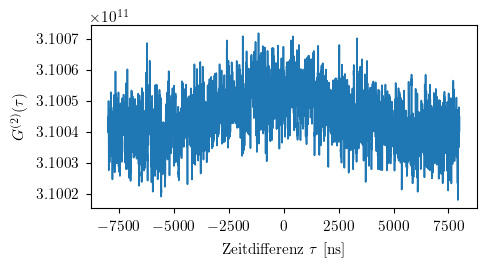

In [9]:
data = np.load('D:/20240711_10x10/measurement_00100.npy')
fig,ax = plt.subplots()
ax.plot(np.arange(-8000,8000,1.6), data)
ax.set(xlabel='Zeitdifferenz $\\tau$ [ns]', ylabel='$G^{(2)}(\\tau)$')
ax.ticklabel_format(useOffset=False)
fig.tight_layout()
fig.savefig('latex/images/Datenaufnahme/G2.pdf', bbox_inches='tight')

#### Plots showing influence of averaging, pattern correction and lowpass

In [13]:
directory = 'D:/20240711_10x10'
file_path_list = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
sum = np.zeros(10000)
weight_sum = 0
for path in tqdm(file_path_list, desc='Do data reduction'): 
    data = np.load(path) 
    weight = np.std(data)**-2
    sum += data*weight
    weight_sum += weight
average_g2 = sum/weight_sum
np.savetxt('reduced_data/intro_plots/only_av.txt', average_g2)
sum = np.zeros(10000)
weight_sum = 0
for path in tqdm(file_path_list, desc='Do data reduction'): 
    data = np.load(path) 
    data = pattern_correction(data)
    weight = np.std(data)**-2
    sum += data*weight
    weight_sum += weight
average_g2 = sum/weight_sum
np.savetxt('reduced_data/intro_plots/av_and_pc.txt', average_g2)
np.savetxt('reduced_data/intro_plots/the_works.txt', lowpass(average_g2))

Do data reduction: 100%|██████████| 9402/9402 [00:50<00:00, 184.93it/s]


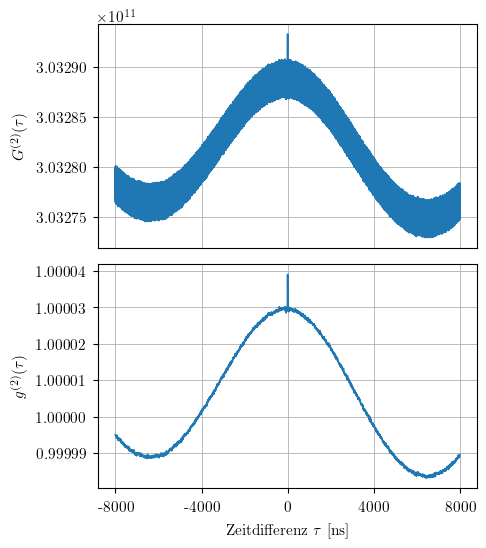

In [49]:
t = np.arange(-8000,8000,1.6)
g2 = np.loadtxt('reduced_data/intro_plots/only_av.txt')
fig, ax = plt.subplots(nrows=2, figsize=(5,2.81*2))
ax[0].plot(t,g2)
ax[0].set(ylabel='$G^{(2)}(\\tau)$')
ax[0].set(xticks=[-8000,-4000,0,4000,8000], xticklabels=[])
ax[0].tick_params(axis='x', which='both', length=0)
ax[0].grid()
ax[1].grid()
g2 = np.loadtxt('reduced_data/intro_plots/the_works.txt')
#fig, ax = plt.subplots()
ax[1].plot(t,g2)
ax[1].set(xlabel='Zeitdifferenz $\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xticks=[-8000,-4000,0,4000,8000], xticklabels=[-8000,-4000,0,4000,8000])
for axis in ax:
    axis.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset=False))
fig.tight_layout()
fig.savefig('latex/images/Datenaufnahme/G2_vs_g2.pdf', bbox_inches='tight')